## Environment setup

In [1]:
import glob
import importlib

## Networks definitions and adaptations

In [2]:
from architecture_definitions import *

oneOverPt = False 
lut_nn = True
output_type = 0
last_input_is_bias = True

if output_type == 1:
    layer3_neurons = 3
    loss_fn = custom_loss3
else: 
    output_cnt = 1
    layer3_neurons = 1
    loss_fn = 'mae'
        
if not last_input_is_bias:
    networkInputSize =  nLayers
    layer2_lutRangesCnt = 1
    layer2_input_offset = None 

print_Classic_NN()  
print_LUT_NN()  

Classic NN definitions:
dense_layer1_size: 128
dense_layer2_size: 64
dense_layer3_size: 48
dense_layer4_size: 1
------------------------
LUT NN definitions:
layer1_lut_size 1024
layer2_lut_size 256
layer3_lut_size 32
layer2_lutRangesCnt 16
layer2_input_offset 8.0
------------------------


### Classic NN data read test

In [3]:
%%time
import io_functions as io
importlib.reload(io)

trainDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/"   
testDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/" 

testFileNames = glob.glob(trainDataDir+'OMTFHits_pats0x0003_newerSample_files_1_100_chunk_0.tfrecord.gzip')
trainFileNames = glob.glob(testDataDir+'OMTFHits_pats0x0003_oldSample_files_*_chunk_0.tfrecord.gzip')

trainDataDir = "/scratch_cmsse/alibordi/data/"
testDataDir = "/scratch_cmsse/alibordi/data/"
testFileNames = glob.glob(trainDataDir+'*15Feb*tfrecord.gzip')
trainFileNames = glob.glob(testDataDir+'*22Feb*.tfrecord.gzip')

batchSize = 4096
nEpochs = 1

dataset = io.get_Classic_NN_dataset(batchSize, nEpochs, trainFileNames, isTrain=True)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

dataset = io.get_Classic_NN_dataset(batchSize, nEpochs, testFileNames, isTrain=False)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

Reading data from files:


2023-04-19 09:07:18.331605: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-19 09:07:18.331625: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 4bdbaaa67b74
2023-04-19 09:07:18.331631: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 4bdbaaa67b74
2023-04-19 09:07:18.331669: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 530.30.2
2023-04-19 09:07:18.331682: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 530.30.2
2023-04-19 09:07:18.331687: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 530.30.2
2023-04-19 09:07:18.332462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instruct

Execution time: 0.0634194349986501
Reading data from files:
Execution time: 0.05183963105082512
CPU times: user 1.82 s, sys: 1.08 s, total: 2.89 s
Wall time: 1.83 s


### LUT NN data read test

In [6]:
%%time
import io_functions as io
importlib.reload(io)

trainDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/"   
testDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/" 

testFileNames = glob.glob(trainDataDir+'OMTFHits_pats0x0003_newerSample_files_1_100_chunk_0.tfrecord.gzip')
trainFileNames = glob.glob(trainDataDir+'OMTFHits_pats0x0003_oldSample_files_*_chunk_0.tfrecord.gzip')

trainDataDir = "/scratch_cmsse/alibordi/data/training/"
testDataDir = "/scratch_cmsse/alibordi/data/test/"
testFileNames = glob.glob(trainDataDir+'*tfrecord.gzip')
trainFileNames = glob.glob(testDataDir+'*iPtX*.tfrecord.gzip')

batchSize = 4096
nEpochs = 1

dataset = io.get_LUT_NN_dataset(batchSize, nEpochs, trainFileNames, 
                                nRefLayers=nRefLayers,
                                layer1_lut_size=layer1_lut_size,
                                layer2_lut_size=layer2_lut_size,
                                layer2_lutRangesCnt=layer2_lutRangesCnt,
                                last_input_is_bias=last_input_is_bias,
                                rangeFactor=rangeFactor,
                                isTrain=True)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

dataset = io.get_LUT_NN_dataset(batchSize, nEpochs, testFileNames, 
                                nRefLayers=nRefLayers,
                                layer1_lut_size=layer1_lut_size,
                                layer2_lut_size=layer2_lut_size,
                                layer2_lutRangesCnt=layer2_lutRangesCnt,
                                last_input_is_bias=last_input_is_bias,
                                rangeFactor=rangeFactor,
                                isTrain=False)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

Reading data from files:
/scratch_cmsse/alibordi/data/test/SingleMu_iPtX_Feb15_Unfiltered.tfrecord.gzip
Execution time: 4.842330540006515
features.shape: (4096, 19)
len(labels) 1
labels[0].shape: (4096,)
weights.shape: (4096,)
Hits in OMTF Layers:
 [  64.   1023.     63.     63.12   62.25   63.25 1023.   1023.   1023.
 1023.   1023.     63.5    63.     63.25   61.75 1023.   1023.   1023.
  144.  ]
ptLabels:
 34.8
weights:
 1.0
Reading data from files:
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_April4_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_iPtX_April4_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_iPtX_Feb22_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_Feb22_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_iPtX_Feb15_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_Feb15_chunk_0_filtered.tfrecor

Index(['eventNum', 'muonEvent', 'muonPt', 'muonEta', 'muonPhi', 'muonCharge',
       'muonDxy', 'muonRho', 'omtfPt', 'omtfEta', 'omtfPhi', 'omtfCharge',
       'omtfHwEta', 'omtfProcessor', 'omtfScore', 'omtfQuality',
       'omtfRefLayer', 'omtfRefHitNum', 'omtfFiredLayers', 'killed', 'hits',
       'phiDist_0', 'phiDist_1', 'phiDist_2', 'phiDist_3', 'phiDist_4',
       'phiDist_5', 'phiDist_6', 'phiDist_7', 'phiDist_8', 'phiDist_9',
       'phiDist_10', 'phiDist_11', 'phiDist_12', 'phiDist_13', 'phiDist_14',
       'phiDist_15', 'phiDist_16', 'phiDist_17'],
      dtype='object')


<AxesSubplot:>

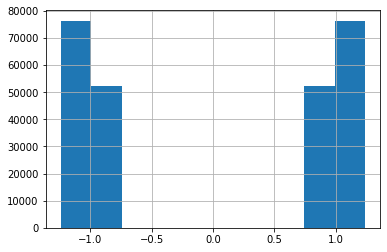

In [12]:
import pandas as pd
import numpy as np
fileName = "/scratch_cmsse/alibordi/data/training/df.parquet_SingleMu_OneOverPt_Feb22_chunk_0.gzip"
df = pd.read_parquet(fileName)
print(df.columns)
df.describe()
df["muonEta"].hist()